# Power Co - Test whether churn is driven by price sensitivity.

## 1: Business Understanding & Problem Framing

### Objective

Formulate the hypothesis as a data science problem and lay out the major steps needed to test this hypothesis. Communicate your thoughts and findings in an email to your LDS, focusing on the potential data that you would need from the client and analytical models you would use to test such a hypothesis.

### Background Information

PowerCo is a major gas and electricity utility that supplies to corporate, SME (Small & Medium Enterprise), and residential customers. The power-liberalization of the energy market in Europe has led to significant customer churn, especially in the SME segment. They have partnered with BCG to help diagnose the source of churning SME customers. 

One of the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it is possible to predict customers likely to churn using a predictive model. The client also wants to try a discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

The Lead Data Scientist (LDS) held an initial team meeting to discuss various hypotheses, including churn due to price sensitivity. After discussion with your team, you have been asked to go deeper on the hypothesis that the churn is driven by the customers’ price sensitivities.

Your LDS wants an email with your thoughts on how the team should go about to test this hypothesis.

## Email

**Subject:** PowerCo: Test whether churn is driven by price sensitivity.

Dear Iman Karimi,

To test client’s hypothesis: whether churn is driven by price sensitivity.We will need to predict customer’s likelihood to churn and understand the effect prices have on churn rates.

### Data needed:

- **Customer data:** characteristics of each client i.e. previous energy
consumption, enterprise etc.
- **Price data:** historical prices the client charge to customers over time
- **Churn data:** whether customer has churned.

### Workflow (iterative process):

1. Data cleaning: modifying/removing any incorrect, incomplete, irrelevant data.
2. Data preprocessing: normalization/standardization for better convergence, encoding categorical values, feature selection by whittling
down predictors to a smaller set that is more informative.
3. Build Binary classification model: (e.g. Logistic regression, random forests, KNN, neural nets) pick the appropriate model after evaluating tradeoff between accuracy, complexity, and interpretability.
4. Model validation: Split data into training, validation, and test and score model performance.

From the model, we will understand the degree of impact prices have on churn rates. This will help us assess the effectiveness of the client’s discounting strategy.

### Context:

Client is a major gas and electricity utility.
- Supplies to corporate, SME, and residential customers.

Significant churn problem.
- Drive by power-liberalization of the energy market in Europe
- Problem is largest in the SME segment

#### Client’s Hypothesis

Churn is driven by price sensitivity.
Client wants to try a discounting strategy by offering customers at high propensity to churn a 20% discount

Regards, <br>
Patrick Guo

## The Datasets

```ml_case_training_output.csv``` named as ```pco_output``` contains:
- id: contact id 
- churned: has the client churned over the next 3 months

```ml_case_training_hist_data.csv``` named as ```pco_hist``` contains the history of energy and power consumption per client:
- id: contact id 
- price_date: reference date
- price_p1_var: price of energy for the 1st period 
- price_p2_var: price of energy for the 2nd 
- periodprice_p3_var: price of energy for the 3rd period 
- price_p1_fix: price of power for the 1st period
- price_p2_fix: price of power for the 2nd period 
- price_p3_fix: price of power for the 3rd period

```ml_case_training_data.csv``` contains:

- id: contact id
- activity_new: category of the company's activity. 
- campaign_disc_elec: code of the electricity campaign the customer last subscribed to.
- channel_sales: code of the sales channel
- cons_12m: electricity consumption of the past 12 months
- cons_gas_12m: gas consumption of the past 12 months
- cons_last_month: electricity consupmtion of the last month
- date_activ: date of activation of the contract
- date_end: registered date of the end of the contract
- date_first_activ: date of first contract of the client
- date_modif_prod: date of last modification of the product
- date_renewal: date of the next contract renewal
- forecast_base_bill_ele: forecasted electricity bill baseline for next month
- forecast_base_bill_year: forecasted electricity bill baseline for calendar year
- forecast_bill_12m: forecasted electricity bill baseline for 12 months
- forecast_cons: forecasted electricity consumption for next month
- forecast_cons_12m: forecasted electricity consumption for next 12 months
- forecast_cons_year: forecasted electricity consumption for next calendar year
- forecast_discount_energy: forecasted value of current discount
- forecast_meter_rent_12m: forecasted bill of meter rental for the next 12 months
- forecast_price_energy_p1: forecasted energy price for 1st period
- forecast_price_energy_p2: forecasted energy price for 2nd period
- forecast_price_pow_p1: forecasted power price for 1st period
- has_gas: indicated if client is also a gas client
- imp_cons: current paid consumption
- margin_gross_pow_ele: gross margin on power subscription
- margin_net_pow_ele: net margin on power subscription
- nb_prod_act: number of active products and services
- net_margin: total net margin
- num_years_antig: antiquity of the client (in number of years)
- origin_up: code of the electricity campaign the customer first subscribed to
- pow_max: subscribed power

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# Show plots in jupyter notebook
%matplotlib inline

import missingno as msno
from scipy.stats import zscore as zscore

import warnings
warnings.filterwarnings("ignore")

# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

## Load Data

In [2]:
# list of dates
dt_lst = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']
     
pco_main = pd.read_csv('data/ml_case_training_data.csv', parse_dates=dt_lst)
pco_hist = pd.read_csv('data/ml_case_training_hist_data.csv', parse_dates=['price_date'])
pco_output = pd.read_csv('data/ml_case_training_output.csv')
pd.set_option('display.max_columns',None)

## Main Dataset

In [3]:
pco_main.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
pco_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

In [5]:
# Percentage of nullity by column
missing_perc = pco_main.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_perc)

Percentage of Missing Values:
 id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.0

In [6]:
# Descriptive statistics
pco_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


### Observations
- 14 columns have negative minimum values.
- ```campaign_disc_ele``` column is missing completely.
- ```activity_new``` column is missing 59.3%.
- The ```date_first_active```, ```forecast_base_bill_ele```, ```forecast_base_bill_year```, ```forecast_bill_12m```, and ```forecast_cons``` columns are each missing 78.2%.

## The History Dataset

In [7]:
pco_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [9]:
# Percentage of nullity by column
missing_perc = pco_hist.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_perc)

Percentage of Missing Values:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


In [10]:
# Descriptive statistics
pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Observations

- ```price_p1_var```, ```price_p2_var```, ```price_p3_var```, ```price_p1_fix```, ```price_p2_fix```, ```price_p3_fix``` are missing 70.4% values.
- ```price_p1_fix```, ```price_p2_fix```, ```price_p3_fix``` contain negative values, which doesn't make sense for price of power.

## The Output Dataset

In [11]:
pco_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [12]:
pco_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [13]:
# Percentage of nullity by column
missing_perc = pco_output.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_perc)

Percentage of Missing Values:
 id       0.0
churn    0.0
dtype: float64


In [14]:
# Descriptive statistics
pco_output.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Observations

- Complete dataset.

## Data Cleaning and Imputation
### Missing Data

### Types of missingness

**Missing Completely at Random (MCAR)** <br>
Missingness has no relationship between any values, observed or missing

**Missing at Random (MAR)** <br>
There is a systematic relationship between missingness and other observed data, but not the missing data

**Missing Not at Random (MNAR)** <br>
There is a relationship between missingness and its values, missing or non-missing

### The History Dataset

In [15]:
# Identify negative columns
negative_cols = ['price_p1_fix','price_p2_fix','price_p3_fix']
# Convert to positive the negative columns in pco_hist
pco_hist[negative_cols] = pco_hist[negative_cols].apply(abs)

pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


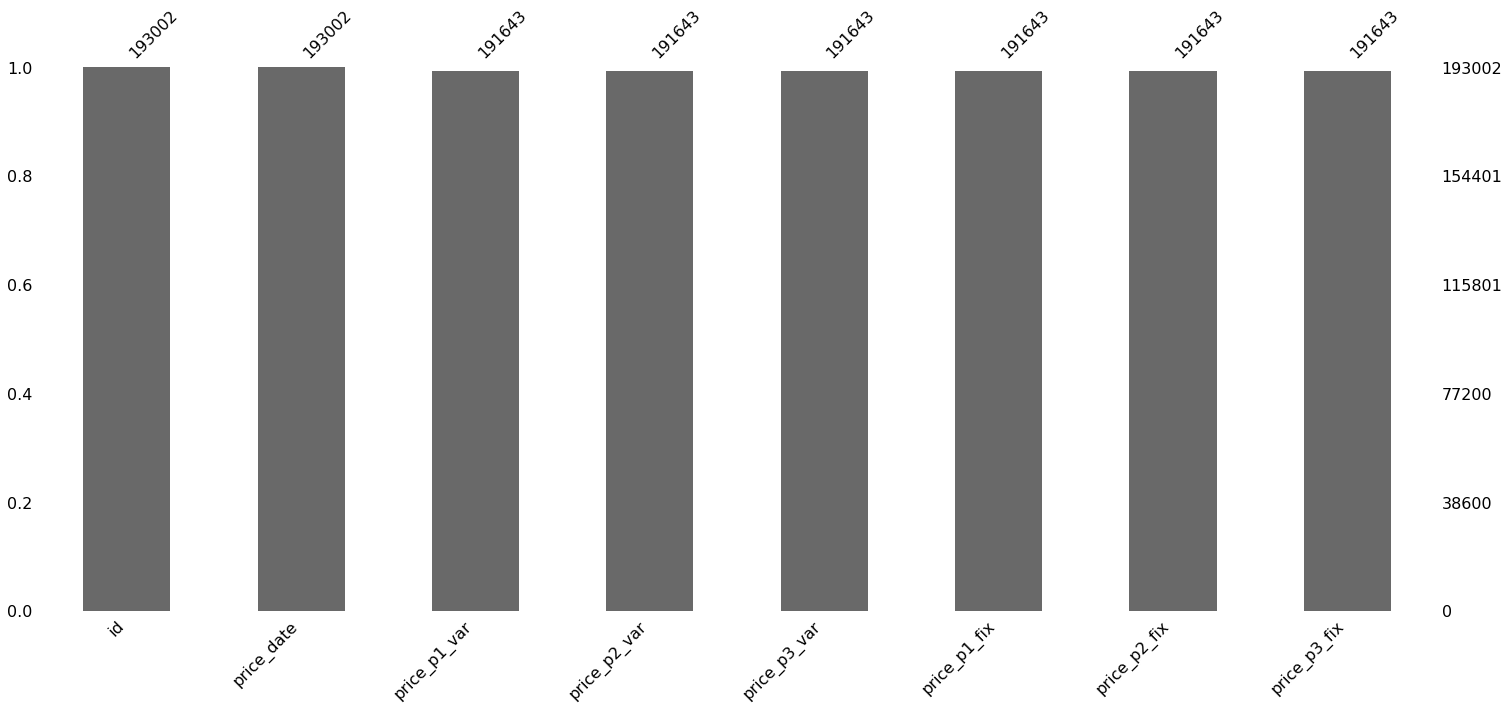

In [16]:
# Visualize the completeness of the dataframe
msno.bar(pco_hist)
plt.show()

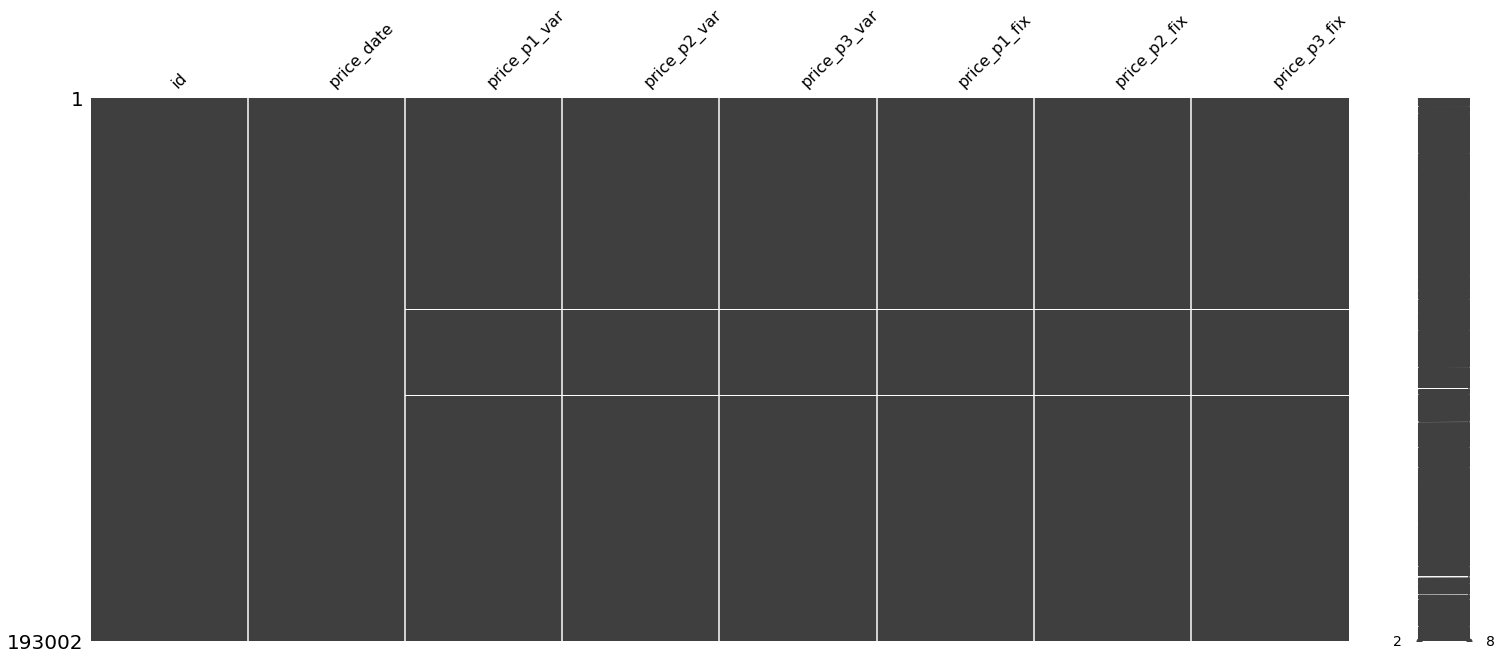

In [17]:
# Visualize the locations of the missing values of the dataset
sorted = pco_hist.sort_values(by = ['id','price_date'])
msno.matrix(sorted)
plt.show()

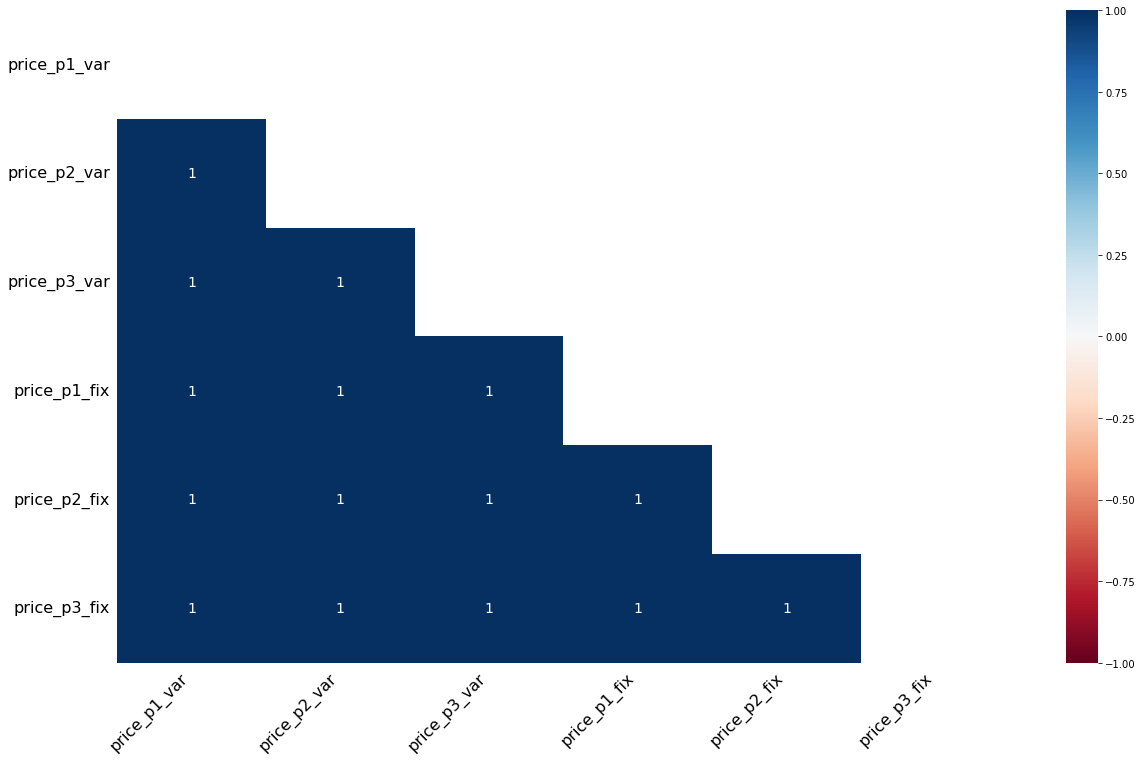

In [18]:
# Visualize the correlation between the numeric variables of the dataframe
msno.heatmap(pco_hist)
plt.show()

In [19]:
# Identify the index of the IDs containing missing values.
hist_NAN_index = pco_hist[pco_hist.isnull().any(axis=1)].index.values.tolist()

# Obtain a dataframe with the missing values
pco_hist_missing = pco_hist.iloc[hist_NAN_index,:]

# Glimpse at the NaN cases of the pco_hist dataset
pco_hist_missing.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
471,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
472,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
475,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
476,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
874,0e90101b08183cc9548e827e4b256f47,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# extract the unique dates of missing data
date_lst = pco_hist_missing['price_date'].unique()
id_lst = pco_hist_missing['id'].unique()

# Create a time dataframe with the unique dates
time_df = pd.DataFrame(data=date_lst, columns=['price_date'] )

# Glimpse the time dataframe
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


#### Observations
The columns containing prices display strong positive correlation in the missingness, suggesting a case of **MNAR**.

We can use trend and cyclicality when imputing time series data.

In [21]:
# Make a copy of pco_hist dataset
pco_hist_ff = pco_hist.copy(deep=True)

# Print prior to imputing missing values
print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

# Fill NaNs using forward fill
pco_hist_ff.fillna(method = 'ffill', inplace=True)

print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75            NaN           NaN           NaN           NaN           NaN
221           NaN           NaN           NaN           NaN           NaN
377           NaN           NaN           NaN           NaN           NaN
413           NaN           NaN           NaN           NaN           NaN
461           NaN           NaN           NaN           NaN           NaN
     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75       0.000000      0.000000     44.266931      0.000000      0.000000
221      0.000000      0.000000     44.266931      0.000000      0.000000
377      0.087970      0.000000     44.266931      0.000000      0.000000
413      0.102239      0.070381     40.565969     24.339581     16.226389
461      0.000000      0.000000     44.266931      0.000000      0.000000


In [22]:
# Merge output dataset with historical forward fill dataset
pco_hist_ff_merged = pco_hist_ff.merge(right=pco_output,on=['id'])
pco_hist_ff_merged.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


### The Main Dataset

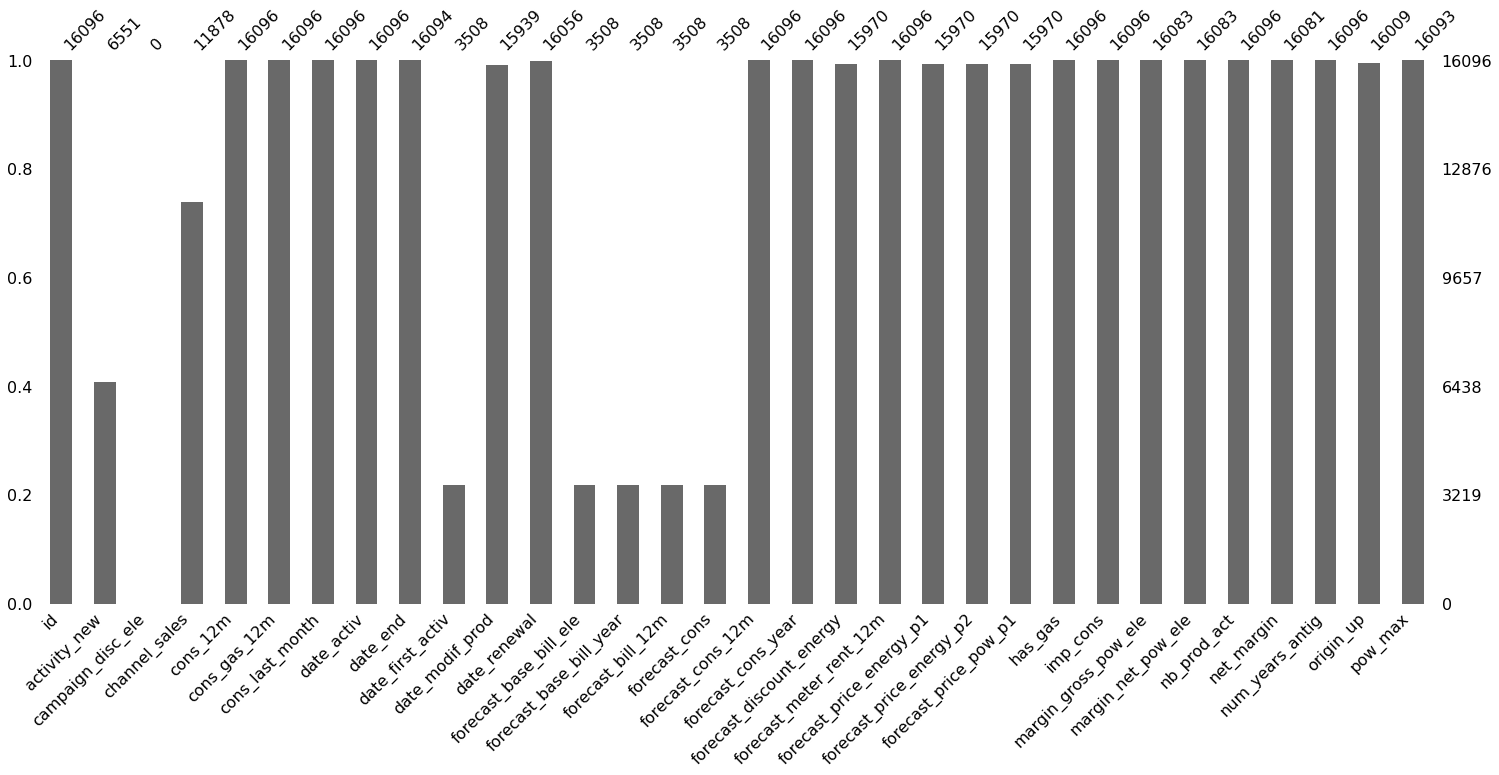

In [23]:
# Visualize the completeness of the dataframe
msno.bar(pco_main)
plt.show()

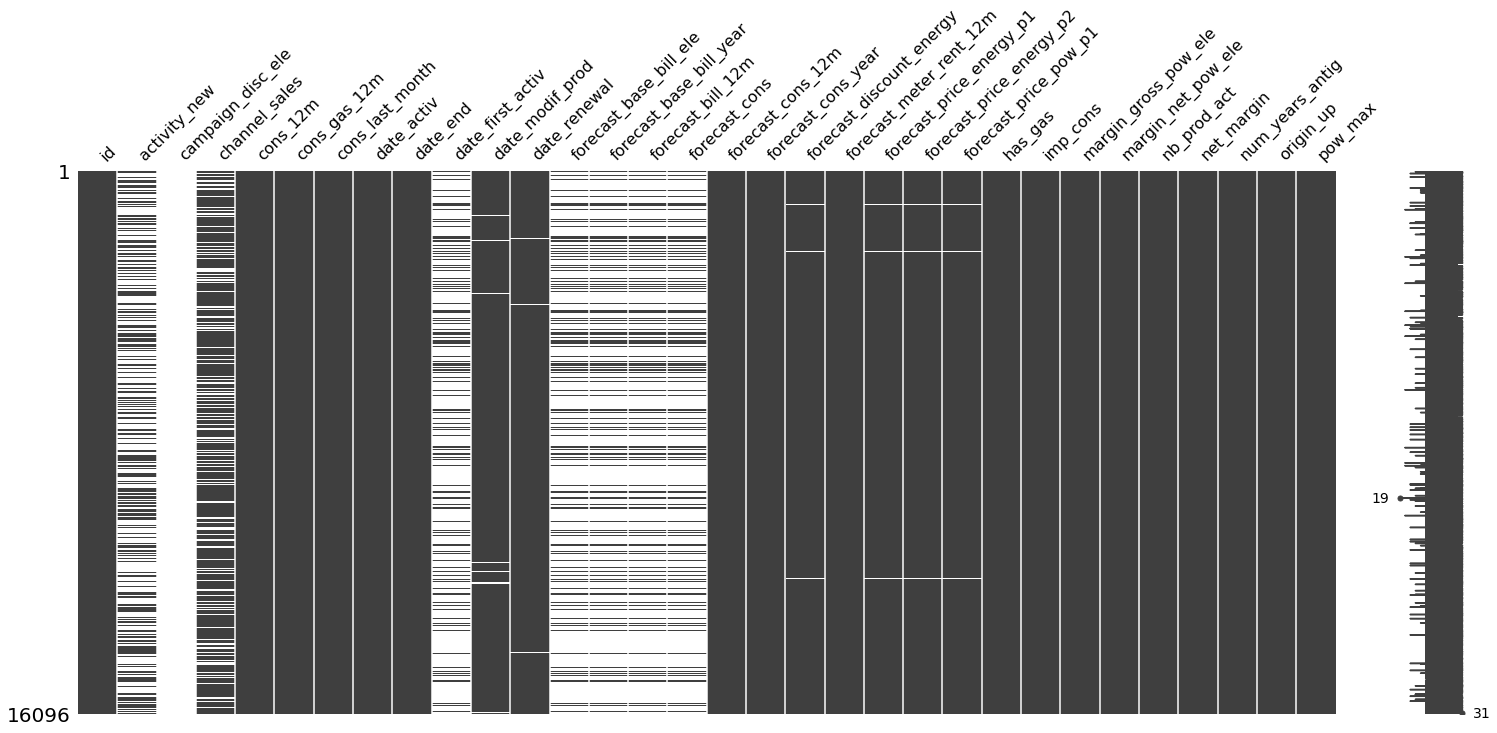

In [24]:
# Visualize the locations of the missing values of the dataset
msno.matrix(pco_main)
plt.show()

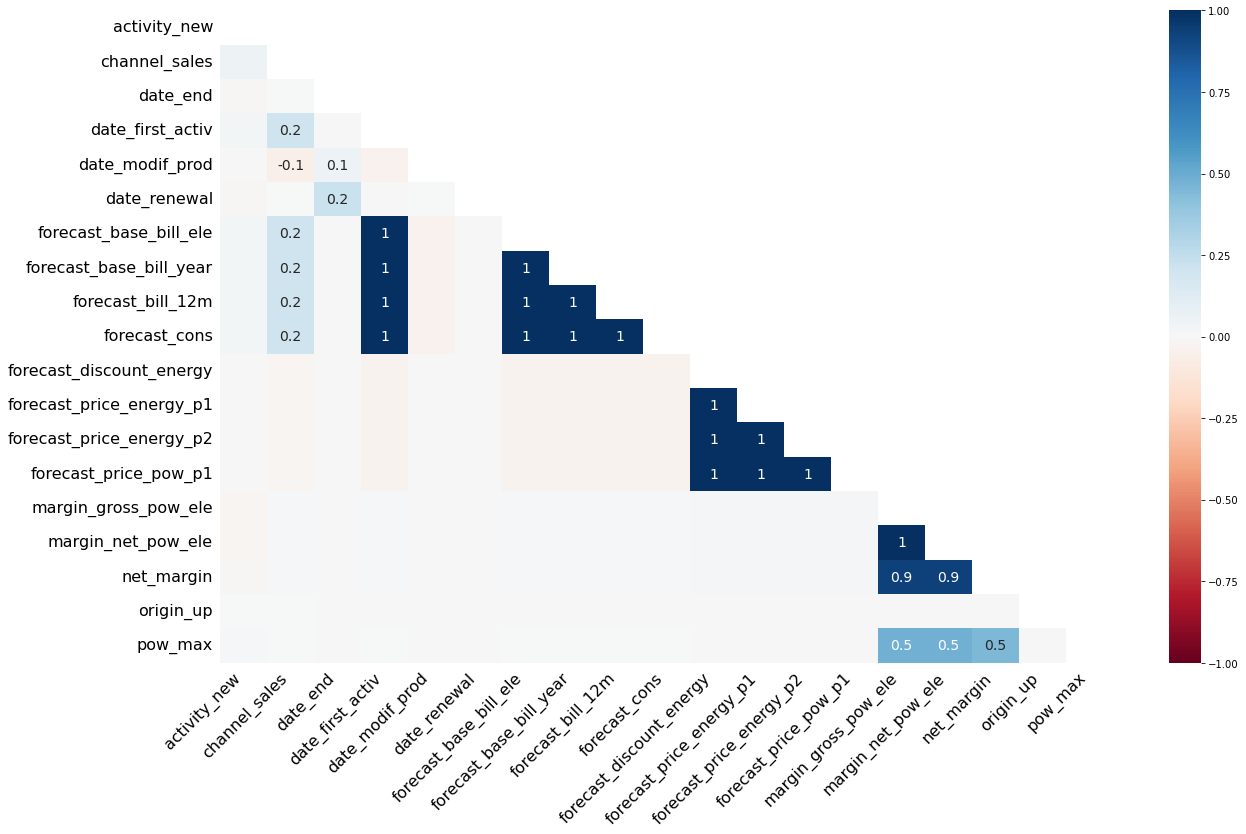

In [25]:
msno.heatmap(pco_main)
plt.show()

In [26]:
# Demonstrate why the date_activ column cannot replace completely date_first_activ
activity = ['date_activ','date_first_activ']

# Filter the columns of interest
pco_activity = pco_main[activity]

# Obtain only the complete cases
pco_activity_cc = pco_activity.dropna(subset=['date_first_activ'],how='any',inplace=False)

# Test whether two objects contain the same elements.
pco_activity_cc.date_activ.equals(pco_activity_cc.date_first_activ)

# Describe it
pco_activity_cc.describe(datetime_is_numeric=True)

,date_activ,date_first_activ
count,3508,3508
mean,2011-09-03 07:45:05.131128832,2011-06-19 20:20:23.261117440
min,2003-09-23 00:00:00,2001-01-10 00:00:00
25%,2010-10-26 00:00:00,2010-08-04 18:00:00
50%,2012-01-03 00:00:00,2011-10-28 00:00:00
75%,2012-08-08 00:00:00,2012-06-22 06:00:00
max,2014-09-01 00:00:00,2014-09-01 00:00:00


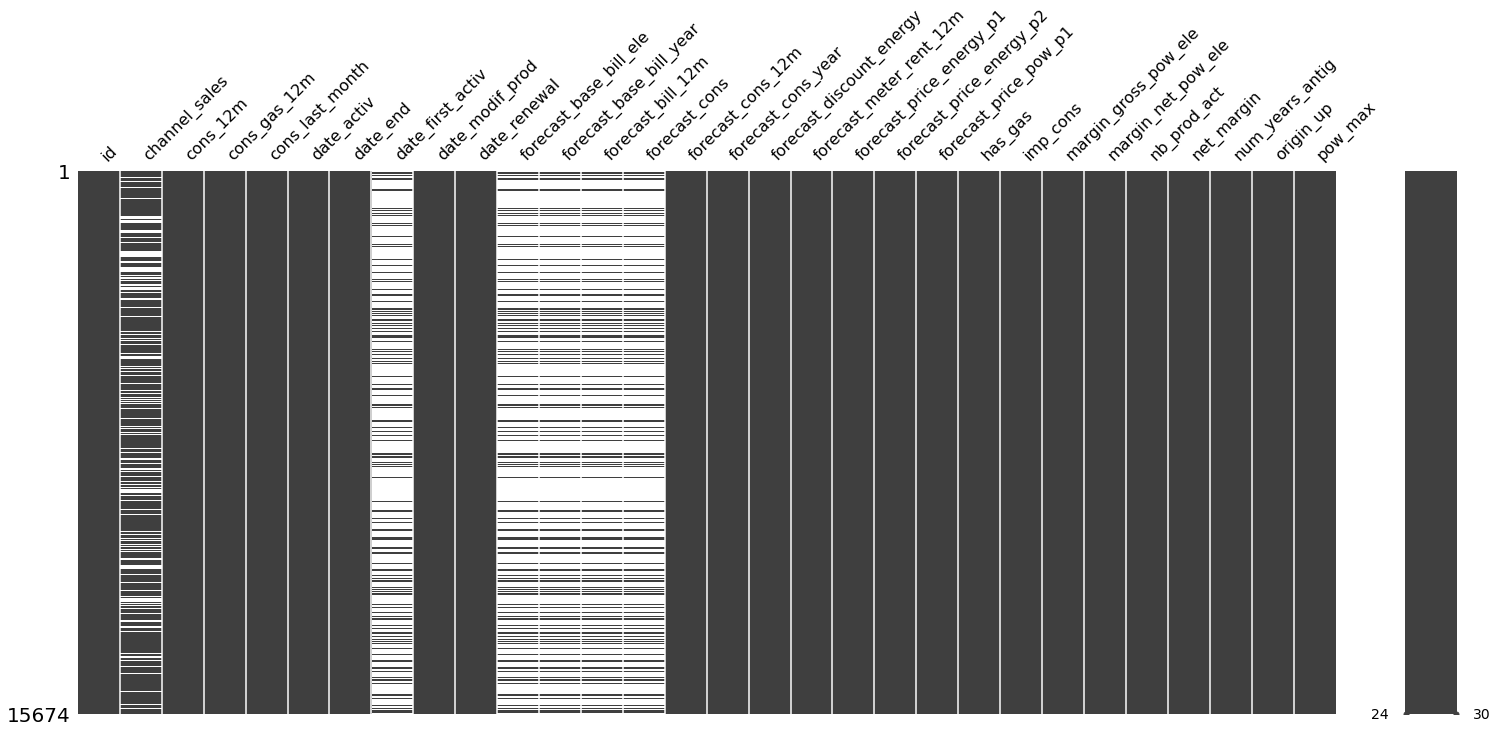

In [27]:
# Drop the column activity_new and campaign_disc_elec
pco_main_drop = pco_main.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)

# Remove date_end date_modif_prod date_renewal origin_up pow_max margin_gross_pow_ele margin_net_pow_ele net_margin
brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
pco_main_drop.dropna(subset=brush, how='any',inplace=True)

msno.matrix(pco_main_drop)
plt.show()

#### Observations

- ```activity_new``` is **MCAR** with low correlation with other variables. Can drop this column
- ```campaign_disc_elec``` is **MCAR**. Can drop this column. Suggests that subscribers are not subscribing through campaign offers.
- ```date_first_activ``` cannot replace ```date_active```. **MAR**
- ```net_margin``` has strong correlation between ```margin_gross_pow_elec``` and ```margin)_net_pow_ele```. Suggests multi-colinearity. 
- ```origin_up``` and ```pow_max``` is **MCAR**. Can drop.
- ```Forecast_base_bill_ele```, ```forecast_base_bill_year```, ```forecast_bill_12m``` and ```forecast_cons variables``` are highly correlated with ```date_first_activ```. **MNAR**

In [28]:
# Choose the columns without missing values
incomplete_cols = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']

complete_cols = [column_name for column_name in pco_main_drop.columns if column_name not in incomplete_cols]

pco_main_cc = pco_main_drop[complete_cols]

# Fix negative numeric variables
numeric = [column_name for column_name in pco_main_cc.columns
           if pco_main_cc[column_name].dtype == 'float64' 
           or pco_main_cc[column_name].dtype == 'int64']

# Overwrite positive values on negative values
pco_main_cc[numeric] = pco_main_cc[numeric].apply(abs)

# Describe
pco_main_cc.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [29]:
# Convert the has_gas column to  Yes/No
pco_main_cc['has_gas'] = pco_main_cc['has_gas'].replace({'t':'Yes','f':'No'})

# Merge the main dataset with the output dataset
pco_main_cc_merged = pco_main_cc.merge(right=pco_output,on=['id'])

# Convert the churn column to Churned/Stayed
pco_main_cc_merged['churn'] = pco_main_cc_merged['churn'].replace({1:'Churned',0:'Stayed'})

In [30]:
pco_main_cc_merged.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,No,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,Stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,No,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,No,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,No,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,No,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,Stayed


In [31]:
# Obtain all the variables except for id
variables = [column_name for column_name in pco_main_cc_merged.columns if column_name != 'id']

# Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'object']

# Obtain all the Date Variables
dates = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'datetime64[ns]']

# Obtain all the numeric columns
numeric = [column_name for column_name in variables
           if column_name not in categorical 
           and column_name != 'id'
           and column_name != 'churn'
           and column_name not in dates]

## Data Visualization

### The Output Dataset

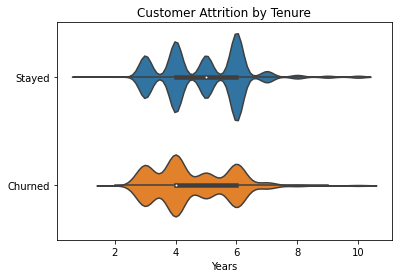

In [32]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=pco_main_cc_merged['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = pco_main_cc_merged[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

#### Facts
- The median age of churners is 4 years
- Customers are more likely to churn during the 4th year than the 7th year
- The median age of retained customers is 5 years

### The Main Dataset

In [33]:
# Most popular electricty campaign
ele_nm = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6584
kamkkxfxxuwbdslkwifmmcsiusiuosws    4188
ldkssxwpmemidmecebumciepifcamkci    3201
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [34]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


#### Facts
- The most popular electricity campaign is ```lxidpiddsbxsbosboudacockeimpuepw``` which has brought 6,584 current customers. With a net margin of $1,541,159.95 in 2015.

In [35]:
# Select current customers with positive net margins
top_customers = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']>='Stayed') & (pco_main_cc_merged['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74
10100,93435ecb05910c7b87e0ae9dbedb2882,4,4148.99
12028,4519e6a8928a015819466fc9de0fa49e,3,4040.60
6405,933527d7a2f669af49075a2380c10ded,4,3744.72
6850,43580ef6cc40fcfd0a9b76eee17a267a,4,3716.78
13553,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65


These are the most profitable customers for PowerCo in terms of net margin. Notet that most of them are within the likely tenure of attrition.

In [36]:
#!jupyter-nbconvert --to PDFviaHTML BCG.ipynb

[NbConvertApp] Converting notebook Task_2.ipynb to PDFviaHTML
[NbConvertApp] Writing 1469246 bytes to Task_2.pdf
